The **North Star Metric** is the single metric that best captures the core value that your product delivers to customers.

Monthly Revenue is used in this tutorial.

Revenue = Active Customer Count * Order Count * Average Revenue per Order

In [2]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')

In [3]:
tx_data = pd.read_csv('data/OnlineRetail.csv', encoding = 'unicode_escape')
tx_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
#converting the type of Invoice Date Field from string to datetime.
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])

#creating YearMonth field for the ease of reporting and visualization
tx_data['InvoiceYearMonth'] = tx_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
tx_data['Revenue'] = tx_data['UnitPrice'] * tx_data['Quantity']
tx_revenue = tx_data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


In [5]:
tx_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceYearMonth  13 non-null     int64  
 1   Revenue           13 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 336.0 bytes


In [6]:
tx_revenue['InvoiceYearMonth'] = tx_revenue['InvoiceYearMonth'].astype(str)

In [11]:
tx_revenue['InvoiceYearMonth'] = pd.to_datetime(tx_revenue['InvoiceYearMonth'], format='%Y%M')

In [14]:
tx_revenue

,InvoiceYearMonth,Revenue
0,2010-12-01,748957.020
1,2011-01-01,560000.260
2,2011-02-01,498062.650
3,2011-03-01,683267.080
4,2011-04-01,493207.121
5,2011-05-01,723333.510
6,2011-06-01,691123.120
7,2011-07-01,681300.111
8,2011-08-01,682680.510
9,2011-09-01,1019687.622


In [15]:
tx_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   InvoiceYearMonth  13 non-null     datetime64[ns]
 1   Revenue           13 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.0 bytes


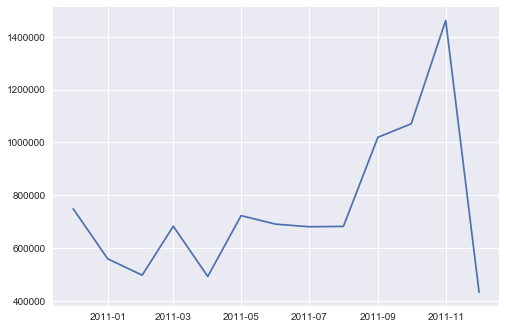

In [13]:
plt.plot(tx_revenue['InvoiceYearMonth'], tx_revenue['Revenue'])

This clearly shows our revenue is growing especially Aug ‘11 onwards (and our data in December is incomplete). Absolute numbers are fine, let’s figure out what is our Monthly Revenue Growth Rate: